In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
data=pd.ExcelFile('capturas_2015-2020.xlsx')

In [19]:
df_2015=data.parse(str(2015))
df_2016=data.parse(str(2016))
df_2017=data.parse(str(2017))
df_2018=data.parse(str(2018))
df_2019=data.parse(str(2019))
df_2020=data.parse(str(2020))



1.   Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes de los años 2015, 2017,2020. Es decir una gráfica por cada año donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.



In [31]:
promedio_2015= df_2015.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
promedio_2016= df_2016.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
promedio_2017= df_2017.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
#promedio_2018= df_2018.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
df_2019.rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}, inplace=True)
promedio_2019= df_2019.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()
df_2020.rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}, inplace=True)
promedio_2020= df_2020.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()

promedios={}
promedios[2015]=promedio_2015
promedios[2017]=promedio_2017
promedios[2020]=promedio_2020

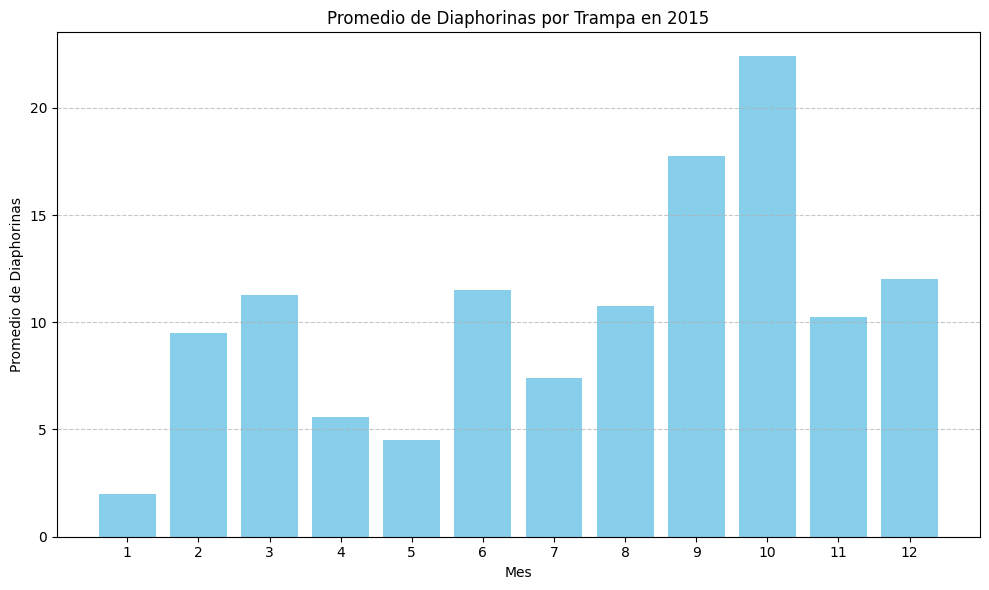

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2015]['Mes'], promedios[2015]['No_DiaphorinasXtrampa'], color='skyblue')
plt.title('Promedio de Diaphorinas por Trampa en 2015')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

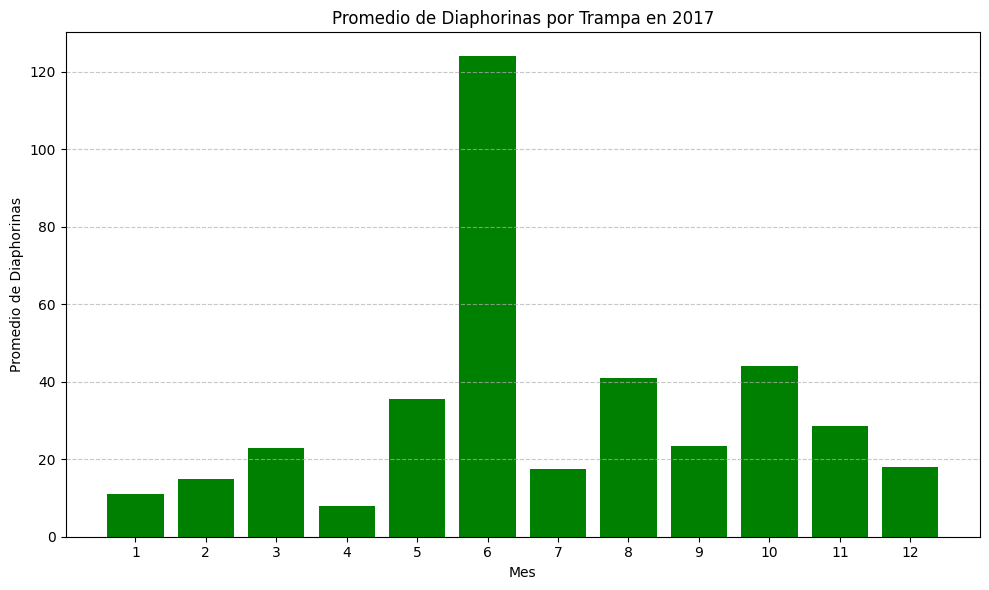

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2017]['Mes'], promedios[2017]['No_DiaphorinasXtrampa'], color='green')
plt.title('Promedio de Diaphorinas por Trampa en 2017')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

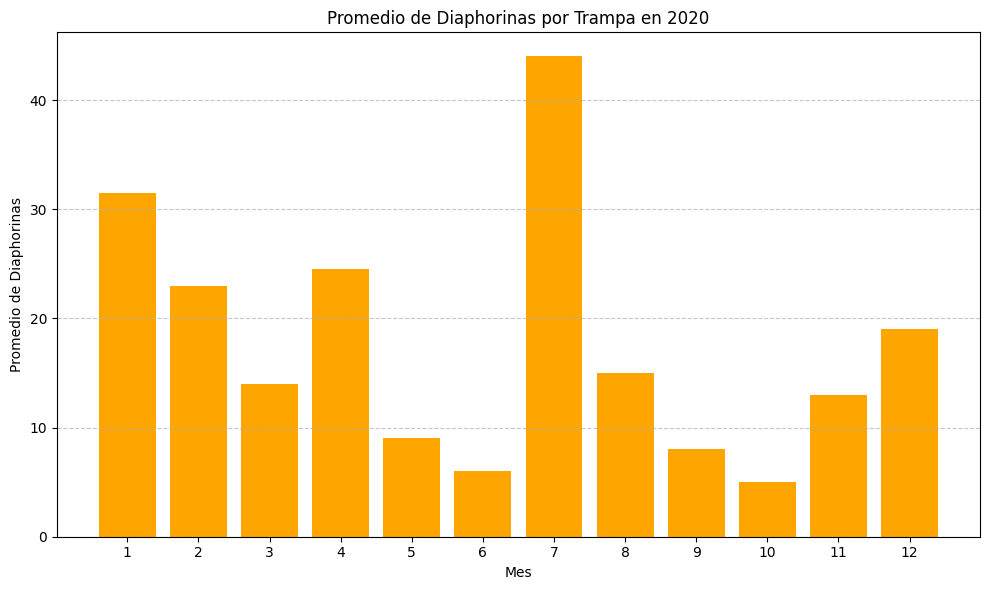

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(promedios[2020]['Mes'], promedios[2020]['No_DiaphorinasXtrampa'], color='orange')
plt.title('Promedio de Diaphorinas por Trampa en 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(range(1, 13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



2.   Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo de un municipio.



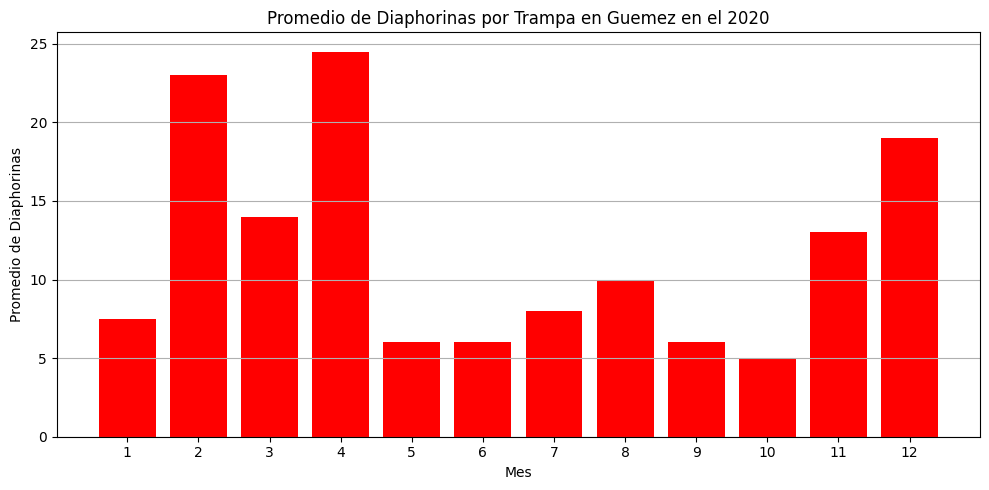

In [27]:
df_2020 = data.parse('2020')
df_2020.rename(columns={'DiaphorinaXTrampa': 'No_DiaphorinasXtrampa'}, inplace=True)
df_municipio=df_2020[df_2020['Municipio'].isin(['GUEMEZ'])]

promedio_mensual = df_municipio.groupby(['Mes','Ubicacion'])['No_DiaphorinasXtrampa'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(promedio_mensual['Mes'], promedio_mensual['No_DiaphorinasXtrampa'], color='red')

plt.title('Promedio de Diaphorinas por Trampa en Guemez en el 2020')
plt.xlabel('Mes')
plt.ylabel('Promedio de Diaphorinas')
plt.xticks(promedio_mensual['Mes'].unique())
plt.grid(axis='y')
plt.tight_layout()
plt.show()



3.   Hacer una tabla donde la primera columna sea el mes, la segunda el índice Id (por trampa) y la tercera el índice Cx para el año 2015.



In [28]:
media_varianza = df_2015.groupby(['Mes', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg(['mean', 'var']).reset_index()
media_varianza.columns = ['Mes', 'Ubicacion', 'Media', 'Varianza']

media_varianza['Id'] = media_varianza['Varianza'] / media_varianza['Media']
media_varianza['Cx'] = (media_varianza['Varianza'] / media_varianza['Media']) - 1

tabla_resultado = media_varianza.groupby('Mes').agg({'Id': 'mean', 'Cx': 'mean'}).reset_index()

tabla_resultado


,Mes,Id,Cx
0,1.0,1.333333,0.333333
1,2.0,1.551807,0.551807
2,3.0,1.955214,0.955214
3,4.0,1.607015,0.607015
4,5.0,1.378070,0.378070
5,6.0,1.670615,0.670615
6,7.0,1.607321,0.607321
7,8.0,1.775027,0.775027
8,9.0,2.353512,1.353512
9,10.0,2.126256,1.126256




4.   Hacer una gráfica del índice Id (por trampa) como función del mes que abarque desde 2015 hasta 2020.



In [32]:
def calcular_id(df):
    media_varianza = df.groupby(['Mes', 'Ubicacion'])['No_DiaphorinasXtrampa'].agg(['mean', 'var']).reset_index()
    media_varianza.columns = ['Mes', 'Ubicacion', 'Media', 'Varianza']
    media_varianza['Id'] = media_varianza['Varianza'] / media_varianza['Media']
    tabla_resultados = media_varianza.groupby('Mes').agg({'Id': 'mean'}).reset_index()

    return tabla_resultados
resultados_por_ano = {}
for year, df in zip(range(2015, 2021), [df_2015, df_2016, df_2017, df_2019, df_2020]):
    tabla_resultados = calcular_id(df)
    resultados_por_ano[year] = tabla_resultados
for year, resultado in resultados_por_ano.items():
    print(f"Resultados para el año {year}:")
    print(resultado)
    print()

Resultados para el año 2015:
     Mes        Id
0    1.0  1.333333
1    2.0  1.551807
2    3.0  1.955214
3    4.0  1.607015
4    5.0  1.378070
5    6.0  1.670615
6    7.0  1.607321
7    8.0  1.775027
8    9.0  2.353512
9   10.0  2.126256
10  11.0  1.839815
11  12.0  1.585501

Resultados para el año 2016:
    Mes        Id
0     1  1.801782
1     2  1.981377
2     3  2.828370
3     4  1.965537
4     5  2.054529
5     6  1.697598
6     7  1.432730
7     8  1.840008
8     9  1.953666
9    10  1.760764
10   11  2.305173
11   12  1.483208

Resultados para el año 2017:
    Mes        Id
0     1       NaN
1     2  2.353256
2     3  3.014083
3     4  2.296515
4     5  2.234832
5     6  3.825917
6     7  1.972105
7     8  2.492407
8     9  2.348229
9    10  3.574410
10   11  2.247216
11   12  1.919222

Resultados para el año 2018:
    Mes        Id
0     1  1.812344
1     2       NaN
2     3  1.988835
3     4  1.690221
4     5  1.793261
5     6  1.687654
6     7  1.695434
7     8  1.511216
8   

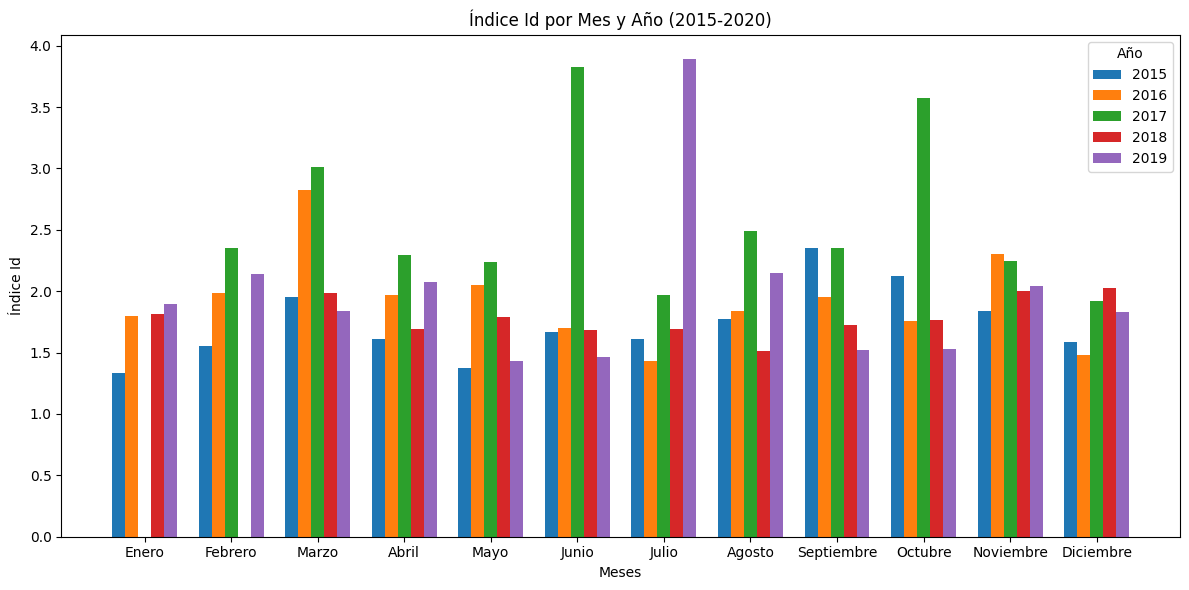

In [33]:
import matplotlib.pyplot as plt
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
valores_id = {year: resultado['Id'].tolist() for year, resultado in resultados_por_ano.items()}

x = range(len(meses))
width = 0.15
fig, ax = plt.subplots(figsize=(12, 6))
for i, year in enumerate(valores_id.keys()):
    ax.bar([pos + i * width for pos in x], valores_id[year], width, label=str(year))
ax.set_xlabel('Meses')
ax.set_ylabel('Índice Id')
ax.set_title('Índice Id por Mes y Año (2015-2020)')
ax.set_xticks([pos + width * (len(valores_id) - 1) / 2 for pos in x])
ax.set_xticklabels(meses)
ax.legend(title='Año')
plt.tight_layout()
plt.show()




5.   Hacer una gráfica del centro de masa de las diaphorinas como función del mes que abarque de 2017 a 2020. Nota: CM=pos*Diaph/Ntrampas, donde CM se refiere al centro de masa, pues es la posición de la trampa, Diaph es el promedio de diaphorinas en la trampa y Ntrampas es el número de trampas que se consideraron en el cálculo.



In [34]:
df_all = pd.concat([df_2017, df_2019, df_2020], ignore_index=True)

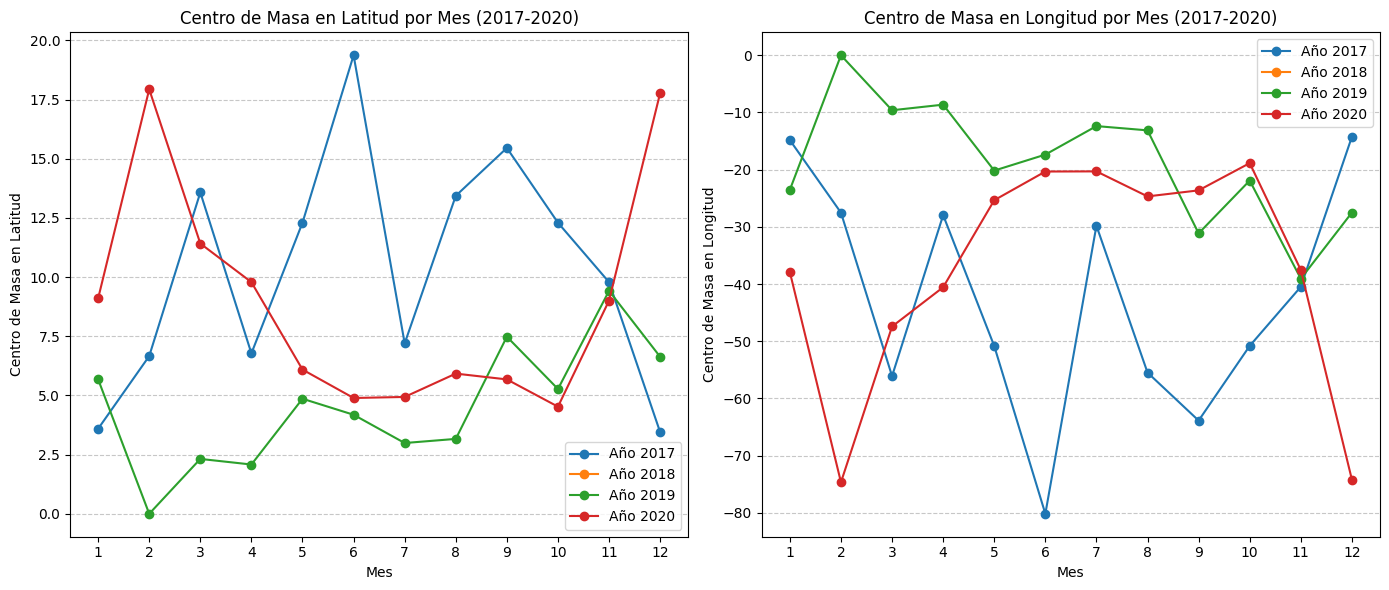

In [35]:
df_all['Fecha'] = pd.to_datetime(df_all['Fecha'])
df_all['Año'] = df_all['Fecha'].dt.year

cm_data = []

for year in [2017, 2018, 2019, 2020]:
    for month in range(1, 13):
        df_month = df_all[(df_all['Año'] == year) & (df_all['Mes'] == month)]

        if df_month.empty:
            continue
        promedio_diaph = df_month.groupby('Ubicacion')['No_DiaphorinasXtrampa'].mean().reset_index()
        promedio_diaph = promedio_diaph.merge(df_month[['Ubicacion', 'Latitud', 'Longitud']].drop_duplicates(), on='Ubicacion')
        N_trampas = len(promedio_diaph)

        cm_latitud = (promedio_diaph['Latitud'] * promedio_diaph['No_DiaphorinasXtrampa']).sum() / N_trampas
        cm_longitud = (promedio_diaph['Longitud'] * promedio_diaph['No_DiaphorinasXtrampa']).sum() / N_trampas
        cm_data.append({'Año': year, 'Mes': month, 'CM_Latitud': cm_latitud, 'CM_Longitud': cm_longitud})
cm_df = pd.DataFrame(cm_data)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for year in [2017, 2018, 2019, 2020]:
    cm_df_year = cm_df[cm_df['Año'] == year]
    plt.plot(cm_df_year['Mes'], cm_df_year['CM_Latitud'], label=f'Año {year}', marker='o')
plt.title('Centro de Masa en Latitud por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa en Latitud')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.subplot(1, 2, 2)
for year in [2017, 2018, 2019, 2020]:
    cm_df_year = cm_df[cm_df['Año'] == year]
    plt.plot(cm_df_year['Mes'], cm_df_year['CM_Longitud'], label=f'Año {year}', marker='o')
plt.title('Centro de Masa en Longitud por Mes (2017-2020)')
plt.xlabel('Mes')
plt.ylabel('Centro de Masa en Longitud')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


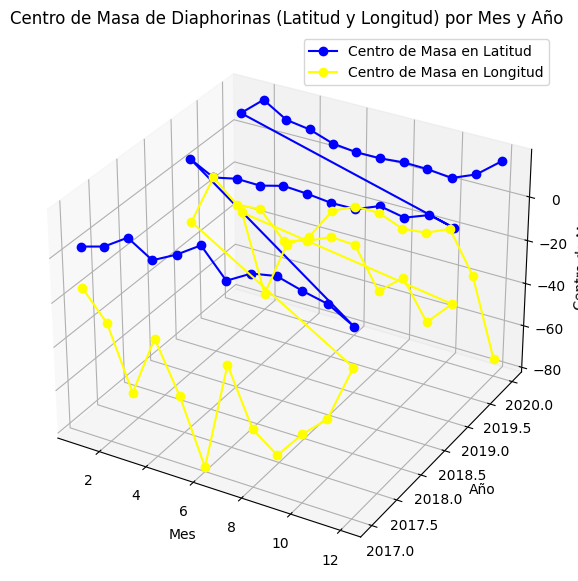

In [37]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(cm_df['Mes'], cm_df['Año'], cm_df['CM_Latitud'], label='Centro de Masa en Latitud', color='blue', marker='o')
ax.plot3D(cm_df['Mes'], cm_df['Año'], cm_df['CM_Longitud'], label='Centro de Masa en Longitud', color='yellow', marker='o')
ax.set_xlabel('Mes')
ax.set_ylabel('Año')
ax.set_zlabel('Centro de Masa')
ax.set_title('Centro de Masa de Diaphorinas (Latitud y Longitud) por Mes y Año')
ax.legend()
plt.show()